<a href="https://colab.research.google.com/github/KilianWdt/DataAnalysis/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import et preprocessing

## Récupération du fichier

In [2]:
!wget --show-progress https://archive.ics.uci.edu/ml/machine-learning-databases/00495/data.zip

--2020-01-31 18:25:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00495/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2864337783 (2.7G) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.67G  45.9MB/s    in 60s     

2020-01-31 18:26:47 (45.8 MB/s) - ‘data.zip’ saved [2864337783/2864337783]



## Dézippage

In [3]:
!unzip data.zip

Archive:  data.zip
   creating: PPG_FieldStudy/
  inflating: PPG_FieldStudy/PPG_FieldStudy_readme.pdf  
   creating: PPG_FieldStudy/S1/
   creating: PPG_FieldStudy/S10/
  inflating: PPG_FieldStudy/S10/S10.pkl  
  inflating: PPG_FieldStudy/S10/S10_activity.csv  
  inflating: PPG_FieldStudy/S10/S10_E4.zip  
  inflating: PPG_FieldStudy/S10/S10_quest.csv  
  inflating: PPG_FieldStudy/S10/S10_RespiBAN.h5  
   creating: PPG_FieldStudy/S11/
  inflating: PPG_FieldStudy/S11/S11.pkl  
  inflating: PPG_FieldStudy/S11/S11_activity.csv  
  inflating: PPG_FieldStudy/S11/S11_E4.zip  
  inflating: PPG_FieldStudy/S11/S11_quest.csv  
  inflating: PPG_FieldStudy/S11/S11_RespiBAN.h5  
   creating: PPG_FieldStudy/S12/
  inflating: PPG_FieldStudy/S12/S12.pkl  
  inflating: PPG_FieldStudy/S12/S12_activity.csv  
  inflating: PPG_FieldStudy/S12/S12_E4.zip  
  inflating: PPG_FieldStudy/S12/S12_quest.csv  
  inflating: PPG_FieldStudy/S12/S12_RespiBAN.h5  
   creating: PPG_FieldStudy/S13/
  inflating: PPG_FieldSt

### On récupère les données dans le .pkl

In [0]:
import pandas as pd
import numpy as np

def toDataframe(data):
    dic = {}
    dic["Subject"]=data["subject"]
    dic["activity"]=np.squeeze(data["activity"])[::4]
    dic["respiration"]=np.squeeze(data["signal"]["chest"]["Resp"])[::700]
    dic["ACC_w_x"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,0]
    dic["ACC_w_y"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,1]
    dic["ACC_w_z"] =np.squeeze(data["signal"]["wrist"]["ACC"])[::32,2]
    dic["temp"] =np.squeeze(data["signal"]["wrist"]["TEMP"])[::4]
    dic["respiration"]=np.squeeze(data["signal"]["chest"]["Resp"])[::700]
    dic["ECG"]=np.squeeze(data["signal"]["chest"]["ECG"])[::700]
    dic["ACC_x"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,0]
    dic["ACC_y"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,1]
    dic["ACC_z"] =np.squeeze(data["signal"]["chest"]["ACC"])[::700,2]

    label_result=[]
    for i in range(len(data["label"])):
        label_result.append(data["label"][i])
        label_result.append(data["label"][i])
    for i in range(abs(len(label_result)-len(dic["activity"]))):
        label_result.append(data["label"][len(data["label"])-1])
    dic["label"]=np.squeeze(label_result)
    df = pd.DataFrame.from_dict(dic)
    return df

In [8]:
import pickle
listeDfs = []

for i in range(1, 16):
  print("datafile = PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl")
  datafile = "PPG_FieldStudy/S"+str(i)+"/S"+str(i)+".pkl"
  with open(datafile, "rb") as f:
    read_data = pd.read_pickle(datafile)
    df = toDataframe(read_data)
    listeDfs.append(df)
    
finalDf = pd.concat(listeDfs)

datafile = PPG_FieldStudy/S1/S1.pkl
datafile = PPG_FieldStudy/S2/S2.pkl
datafile = PPG_FieldStudy/S3/S3.pkl
datafile = PPG_FieldStudy/S4/S4.pkl
datafile = PPG_FieldStudy/S5/S5.pkl
datafile = PPG_FieldStudy/S6/S6.pkl
datafile = PPG_FieldStudy/S7/S7.pkl
datafile = PPG_FieldStudy/S8/S8.pkl
datafile = PPG_FieldStudy/S9/S9.pkl
datafile = PPG_FieldStudy/S10/S10.pkl
datafile = PPG_FieldStudy/S11/S11.pkl
datafile = PPG_FieldStudy/S12/S12.pkl
datafile = PPG_FieldStudy/S13/S13.pkl
datafile = PPG_FieldStudy/S14/S14.pkl
datafile = PPG_FieldStudy/S15/S15.pkl


In [9]:
finalDf

,Subject,activity,respiration,ACC_w_x,ACC_w_y,ACC_w_z,temp,ECG,ACC_x,ACC_y,ACC_z,label
0,S1,0.0,4.441833,-0.765625,-0.078125,0.671875,32.13,0.015610,0.8564,-0.0678,-0.3656,49.611369
1,S1,0.0,-1.475525,-0.765625,-0.078125,0.671875,32.16,-0.089905,0.8510,-0.0674,-0.3694,49.611369
2,S1,0.0,2.915955,-0.750000,-0.078125,0.671875,32.15,0.159714,0.8520,-0.0666,-0.3826,50.323992
3,S1,0.0,-3.044128,-0.750000,-0.078125,0.671875,32.15,-0.012955,0.8490,-0.0696,-0.3740,50.323992
4,S1,0.0,-1.623535,-1.046875,-0.046875,0.843750,32.15,0.014603,0.8300,-0.0102,-0.3502,52.708336
...,...,...,...,...,...,...,...,...,...,...,...,...
7934,S15,0.0,-2.540588,-0.265625,0.015625,0.953125,33.99,0.214462,0.8894,0.0398,-0.2086,80.853007
7935,S15,0.0,2.925110,-0.250000,0.000000,0.953125,34.00,0.021835,0.9006,0.0178,-0.1998,80.853007
7936,S15,0.0,-1.231384,-0.812500,0.843750,0.000000,33.99,0.041794,0.9014,0.0306,-0.2344,80.853007
7937,S15,0.0,1.791382,-0.500000,0.859375,0.062500,33.99,-0.306839,0.9160,0.0176,-0.2230,80.853007


Visualisation

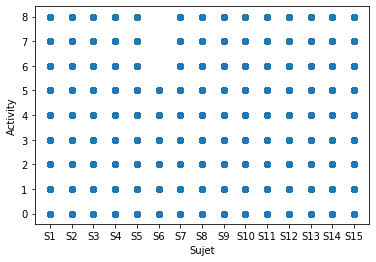

In [32]:
import matplotlib.pyplot as plt

plt.scatter(finalDf["Subject"], finalDf["activity"])
plt.ylabel('Activity')
plt.xlabel("Sujet")
plt.show()

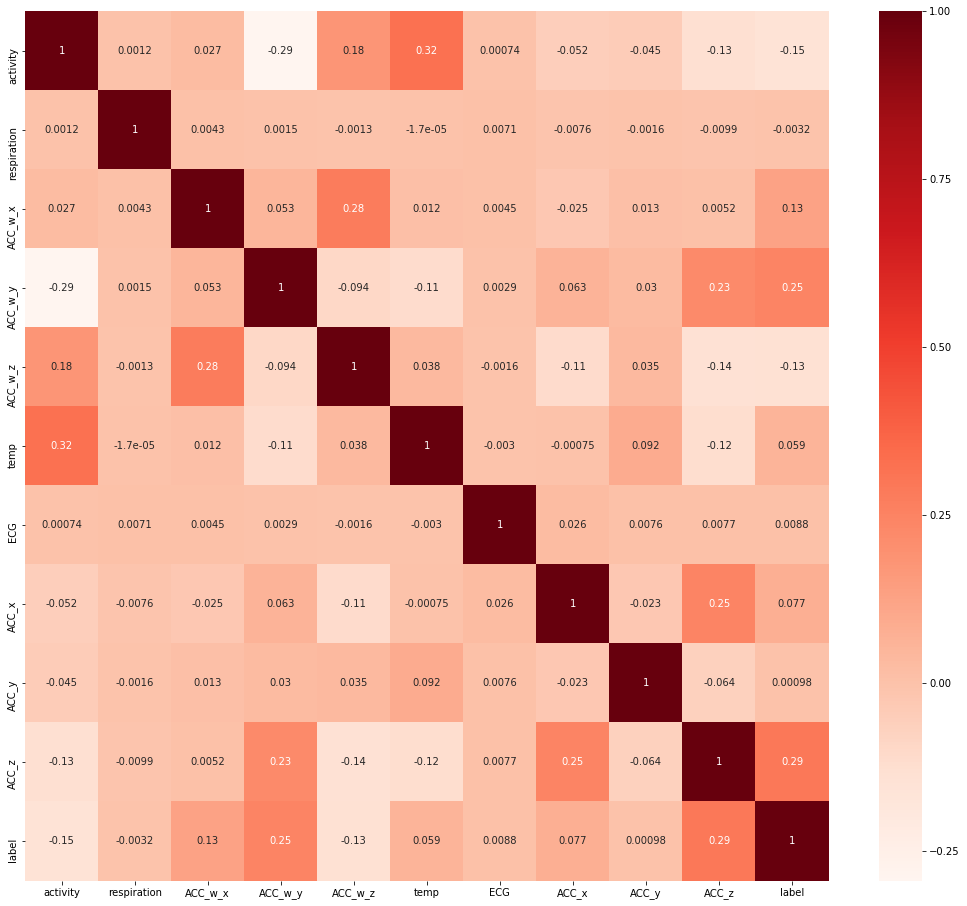

In [37]:
import seaborn as sn
matrix_correlation = finalDf.corr()

plt.figure(figsize=(18,16))
sn.heatmap(matrix_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

Modélisation

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Y = finalDf["activity"]
X = finalDf.drop(["activity"], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [0]:
model = RandomForestClassifier()

model.fit(xTrain, yTrain)

prediction = model.predict(xTest)

acc2 = accuracy_score(yTest, prediction)

print ("Accuracy pour Random Forest")
print (acc2)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(xTrain,yTrain)

y_pred=logreg.predict(xTest)

showConfMatrix(yTest, y_pred)